In [185]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# TPR = TP /（TP + FN）
# FPR = FP /（FP + TN）
def tpr_weight_funtion(y_predict,y_true):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=False)
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]

    return 'tpr', 0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3, True

In [186]:
y_predict = [0.1,0.3,0.1,0.2,0.2,0.3,0.4]
y_true = [0,0,0,1,0,0,1]
y_predict = [0.0001,0.0006,0.2,0.7,0.3,0.4,0.5]

In [201]:
table = pd.read_csv('../data/train.csv')

In [280]:
import copy

In [286]:
y_true = copy.copy(table['label'])
y_predict = copy.copy(table['label'])

In [287]:
def mask1(x):
    rate =0.1
    for i in range(len(x)):
        if x[i] == 1:
            if np.random.randint(10)<rate*10:
                x[i]=0
    return x

In [288]:
def mask0(x):
    rate =0.005
    for i in range(len(x)):
        if x[i] == 0:
            if np.random.randint(1000)<rate*1000:
                x[i]=1
    return x

In [289]:
y_predict = mask0(y_predict)
# y_predict = mask1(y_predict)

In [290]:
tpr_weight_funtion(y_predict, y_true)

('tpr', 0.6796645012745662, True)

In [215]:
d = pd.DataFrame()
d['prob'] = list(np.array(y_predict))
d['y'] = list(y_true)
d = d.sort_values(['prob'], ascending=[0])
y = d.y
PosAll = pd.Series(y).value_counts()[1]
NegAll = pd.Series(y).value_counts()[0]
pCumsum = d['y'].cumsum()
nCumsum = np.arange(len(y)) - pCumsum + 1
pCumsumPer = pCumsum / PosAll
nCumsumPer = nCumsum / NegAll
TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3

1.0

In [104]:
d

,prob,y
27747,1,1
36952,1,1
3334,1,1
23433,1,1
8540,1,1
...,...,...
13817,0,0
13818,0,0
13819,0,0
13821,0,0


In [105]:
PosAll

2757

In [106]:
NegAll

37243

In [107]:
pCumsum

27747       1
36952       2
3334        3
23433       4
8540        5
         ... 
13817    2757
13818    2757
13819    2757
13821    2757
39999    2757
Name: y, Length: 40000, dtype: int64

In [108]:
nCumsum

27747        0
36952        0
3334         0
23433        0
8540         0
         ...  
13817    37239
13818    37240
13819    37241
13821    37242
39999    37243
Name: y, Length: 40000, dtype: int64

In [113]:
pCumsumPer

27747    0.000363
36952    0.000725
3334     0.001088
23433    0.001451
8540     0.001814
3340     0.002176
17783    0.002539
3347     0.002902
3350     0.003264
23443    0.003627
8531     0.003990
3356     0.004353
36857    0.004715
3362     0.005078
3364     0.005441
3368     0.005803
32053    0.006166
17758    0.006529
36842    0.006892
23461    0.007254
3381     0.007617
17752    0.007980
36836    0.008342
36834    0.008705
36830    0.009068
27599    0.009431
32064    0.009793
8505     0.010156
36826    0.010519
17795    0.010881
13274    0.011244
3325     0.011607
32000    0.011970
3256     0.012332
23367    0.012695
8599     0.013058
8598     0.013420
8594     0.013783
27671    0.014146
23379    0.014509
31984    0.014871
3280     0.015234
17833    0.015597
23393    0.015959
8576     0.016322
17820    0.016685
36886    0.017048
23402    0.017410
3300     0.017773
8567     0.018136
36905    0.018498
32011    0.018861
36898    0.019224
36895    0.019587
32014    0.019949
13270    0

In [114]:
nCumsumPer

27747    0.000000
36952    0.000000
3334     0.000000
23433    0.000000
8540     0.000000
3340     0.000000
17783    0.000000
3347     0.000000
3350     0.000000
23443    0.000000
8531     0.000000
3356     0.000000
36857    0.000000
3362     0.000000
3364     0.000000
3368     0.000000
32053    0.000000
17758    0.000000
36842    0.000000
23461    0.000000
3381     0.000000
17752    0.000000
36836    0.000000
36834    0.000000
36830    0.000000
27599    0.000000
32064    0.000000
8505     0.000000
36826    0.000000
17795    0.000000
13274    0.000000
3325     0.000000
32000    0.000000
3256     0.000000
23367    0.000000
8599     0.000000
8598     0.000000
8594     0.000000
27671    0.000000
23379    0.000000
31984    0.000000
3280     0.000000
17833    0.000000
23393    0.000000
8576     0.000000
17820    0.000000
36886    0.000000
23402    0.000000
3300     0.000000
8567     0.000000
36905    0.000000
32011    0.000000
36898    0.000000
36895    0.000000
32014    0.000000
13270    0

In [111]:
abs(nCumsumPer-0.001).idxmin()

26579

In [94]:
abs(nCumsumPer-0.005).idxmin()

3

In [52]:
abs(nCumsumPer-0.01).idxmin()

6

In [14]:
TR1

0.3333333333333333

In [46]:
print("【秦皇岛】 关于调整住房公积金贷款额度测算办法")
jkye = float(input("借款人账户余额："))
jkjcjs = float(input("借款人公积金缴存基数:"))
if(jkye < 10000):
	jkye = 10000
jksjxs = 0
jksj = float(input("借款人缴存月数:"))
if(jksj >=6 and jksj <=24):
	jksjxs = 1
elif(jksj >=25 and jksj <= 36):
	jksjxs = 1.2
elif(jksj >=37 and jksj <= 48):
	jksjxs = 1.5
elif(jksj > 48):
	jksjxs = 2
poye = float(input("配偶人账户余额："))
pojcjs = float(input("配偶人公积金缴存基数:"))
posjxs = 0
posj = float(input("配偶人缴存月数:"))
if(posj >=6 and posj <=24):
	posjxs = 1
elif(posj >=25 and posj <= 36):
	posjxs = 1.2
elif(posj >=37 and posj <= 48):
	posjxs = 1.5
elif(posj > 48):
	posjxs = 2
ed = jkye*10*jksjxs+poye*10*posjxs
print("计算公式："+str(ed)+" = "+str(jkye)+"*10*"+str(jksjxs)+"+"+str(poye)+"*10*"+str(posjxs))
if(ed > 600000):
	ed = 600000
print("可贷款额度："+str(ed)+"元")
hdnl = (jkjcjs+pojcjs)*0.5
print("计算公式："+str(hdnl)+ " = ("+str(jkjcjs)+"+"+str(pojcjs)+")*0.5")

print("还贷能力为："+str(hdnl)+"元/每月")

【秦皇岛】 关于调整住房公积金贷款额度测算办法
借款人账户余额：10000
借款人公积金缴存基数:1400
借款人缴存月数:12
配偶人账户余额：10000
配偶人公积金缴存基数:1400
配偶人缴存月数:12
计算公式：200000.0 = 10000.0*10*1+10000.0*10*1
可贷款额度：200000.0元
计算公式：1400.0 = (1400.0+1400.0)*0.5
还贷能力为：1400.0元/每月


In [156]:
seeds = []
for i in range(100000):
    seeds.append(np.random.randint(10))

In [157]:
seeds = np.array(seeds)
from collections import Counter

In [161]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [159]:
x, y = [],[]
co = dict(Counter(seeds))
co = sorted(co.items(), key=lambda x:x[0])
for key in co:
    x.append(key[0])
    y.append(key[1])

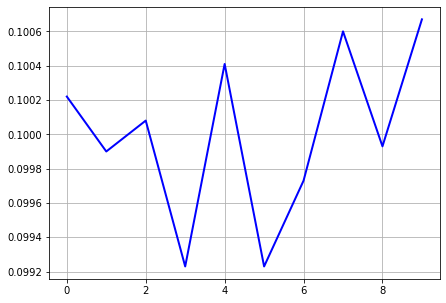

In [154]:
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(x,y, 'b',linewidth=2)
ax.grid(True)


findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.


y = [-0.8044583   0.32093155 -0.02548288  0.64432383 -0.30079667  0.38947455
 -0.1074373  -0.47998308  0.5950355  -0.46466753]
x=range(0, 10)


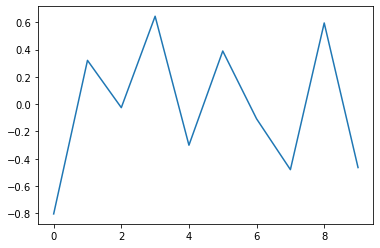

In [126]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(1000)
y = np.random.standard_normal(10)
print ("y = %s"% y)
x = range(len(y))
print ("x=%s"% x)
plt.plot(y)
plt.show()